<a href="https://colab.research.google.com/github/AndrewNewton13/Learning/blob/main/CNN_and_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-07-17 07:22:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.135.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  55.1MB/s    in 1.9s    

2021-07-17 07:22:50 (55.1 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['.DS_Store' 'pizza' 'steak']


In [ ]:

# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 384, 3)


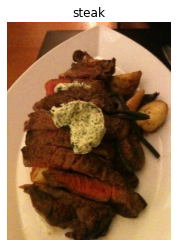

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
# View the img (actually just a big array/tensor)
img

array([[[113,  32,   3],
        [117,  36,   7],
        [125,  44,  15],
        ...,
        [ 14,  15,  10],
        [ 14,  15,  10],
        [  9,  10,   5]],

       [[122,  41,  12],
        [122,  41,  12],
        [125,  44,  15],
        ...,
        [ 11,  12,   7],
        [ 11,  12,   7],
        [  6,   7,   2]],

       [[128,  44,  16],
        [122,  38,  10],
        [119,  38,   9],
        ...,
        [  6,   6,   4],
        [  6,   6,   4],
        [  3,   3,   1]],

       ...,

       [[210, 167, 112],
        [197, 154,  99],
        [199, 157,  99],
        ...,
        [242, 217, 150],
        [242, 218, 146],
        [245, 221, 149]],

       [[205, 161, 112],
        [195, 151, 102],
        [201, 158, 107],
        ...,
        [241, 216, 150],
        [242, 218, 148],
        [244, 220, 150]],

       [[198, 154, 109],
        [191, 147, 102],
        [199, 155, 108],
        ...,
        [239, 214, 148],
        [239, 214, 147],
        [241, 217, 147]]

In [ ]:
# View the image shape
img.shape # returns (width, height, colour channels)

(512, 384, 3)

In [ ]:
# Get all the pixel values between 0 & 1
img/255. # Max value of a pixel is 255

array([[[0.44313725, 0.1254902 , 0.01176471],
        [0.45882353, 0.14117647, 0.02745098],
        [0.49019608, 0.17254902, 0.05882353],
        ...,
        [0.05490196, 0.05882353, 0.03921569],
        [0.05490196, 0.05882353, 0.03921569],
        [0.03529412, 0.03921569, 0.01960784]],

       [[0.47843137, 0.16078431, 0.04705882],
        [0.47843137, 0.16078431, 0.04705882],
        [0.49019608, 0.17254902, 0.05882353],
        ...,
        [0.04313725, 0.04705882, 0.02745098],
        [0.04313725, 0.04705882, 0.02745098],
        [0.02352941, 0.02745098, 0.00784314]],

       [[0.50196078, 0.17254902, 0.0627451 ],
        [0.47843137, 0.14901961, 0.03921569],
        [0.46666667, 0.14901961, 0.03529412],
        ...,
        [0.02352941, 0.02352941, 0.01568627],
        [0.02352941, 0.02352941, 0.01568627],
        [0.01176471, 0.01176471, 0.00392157]],

       ...,

       [[0.82352941, 0.65490196, 0.43921569],
        [0.77254902, 0.60392157, 0.38823529],
        [0.78039216, 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 42s 213ms/step - loss: 0.5841 - accuracy: 0.6633 - val_loss: 0.3907 - val_accuracy: 0.8420
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4157 - accuracy: 0.8147 - val_loss: 0.3673 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3958 - accuracy: 0.8333 - val_loss: 0.3085 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3369 - accuracy: 0.8580 - val_loss: 0.2810 - val_accuracy: 0.9000
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.2982 - accuracy: 0.8767 - val_loss: 0.2720 - val_accuracy: 0.8900


In [ ]:
# Runtime > change runtime type > GPU

In [ ]:
# Get a model summary

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
# Let's replicate the model we built in a previous section to see if it works with our image data
# It's the model from tensforflow playground

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Flatten(input_shape=(224,224,3)))
model_2.add(tf.keras.layers.Dense(4,activation='relu'))
model_2.add(tf.keras.layers.Dense(4,activation='relu'))
model_2.add(tf.keras.layers.Dense(1,activation='sigmoid'))

# Compile model_2
loss = tf.keras.losses.BinaryCrossentropy()
opti = tf.keras.optimizers.Adam()
metrics = 'accuracy'
model_2.compile(loss=loss,optimizer=opti,metrics=metrics)

# Fit model_2
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 176ms/step - loss: 1.1880 - accuracy: 0.5093 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Despite having 20x more parameters than model_1, model_2 performs terribly...
# Let's try to improve it
# Model_3 add an extra layer and more hidden units

In [ ]:
tf.random.set_seed(42)

# Create model_3
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Flatten(input_shape=(224,224,3)))
model_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile model_3
loss = tf.keras.losses.BinaryCrossentropy()
opti = tf.keras.optimizers.Adam()
metrics = 'accuracy'
model_3.compile(loss=loss,optimizer=opti,metrics=metrics)

# Fit model_#
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 176ms/step - loss: 2.7672 - accuracy: 0.5993 - val_loss: 0.6954 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.8648 - accuracy: 0.7020 - val_loss: 1.3063 - val_accuracy: 0.5860
Epoch 3/5
47/47 [==============================] - 8s 172ms/step - loss: 0.8015 - accuracy: 0.7000 - val_loss: 0.7537 - val_accuracy: 0.6840
Epoch 4/5
47/47 [==============================] - 8s 172ms/step - loss: 0.5719 - accuracy: 0.7433 - val_loss: 0.7657 - val_accuracy: 0.5600
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.4348 - accuracy: 0.8100 - val_loss: 0.4214 - val_accuracy: 0.7840


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Binary Classification: Let's break it down
# 1. Become one with the data (visualize, visualize, visualize)
# 2. Preprocess the data (prepare it for model, scaling/normalizing)
# 3. Create model (start with a baseline/benchmark)
# 4. Fit the model 
# 5. Evaluate the model
# 6. Try to improve the model
# 7. Repeat until satisfied(experiment, experiment, experiment)

In [ ]:
# 1. Visualize the data

Image shape: (512, 512, 3)
Image shape: (512, 384, 3)


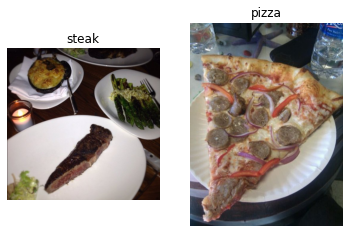

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
# 2. Preprocess the data, prepare it for a model

In [ ]:
# Define our directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
# Next step: Turn data into batches
# Batches are subsets of the data rather than looking at all images
# Batches make it easier to store the patterns in processors memory
# Too many images will mean the model can not learn patterns very well
# Use minibatches of 32

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the next batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data) # 1500 training images / 32 = about 47

47

In [ ]:
# Get the first two images 
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [ ]:
# Create a CNN model (start with a baseline)
# A baseline is relatively simple model/existing results that you want to beat

In [ ]:
import tensorflow as tf

In [ ]:
# make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline model)
model_4 = tf.keras.Sequential()
model_4.add(Conv2D(filters=10, # number of sliding windows going across an input, higher = more complex model
                   kernel_size=3, # size of the sliding window going across an input
                   strides=1, # the step size of kernel sliding across
                   padding='valid', # if "same", output shape and input shape are same 
                   activation='relu',
                   input_shape=(224,224,3))) # input layer (specify input shape)
model_4.add(Conv2D(10,3,activation='relu'))
model_4.add(tf.keras.layers.Conv2D(10,3,activation='relu'))
model_4.add(Flatten())
model_4.add(Dense(1,activation='sigmoid')) # output layer (working with binary classification so only 1 output neuron)

# Compile model_4
loss = tf.keras.losses.BinaryCrossentropy()
opti = tf.keras.optimizers.Adam()
metrics = 'accuracy'
model_4.compile(loss=loss,optimizer=opti,metrics=metrics)


In [ ]:
# Check the lengths of training and test data generations
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit model_4
history_4 = model_4.fit(train_data, # combination of labels and sample data
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 206ms/step - loss: 1.0191 - accuracy: 0.6987 - val_loss: 0.4375 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4591 - accuracy: 0.7873 - val_loss: 0.4213 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3577 - accuracy: 0.8633 - val_loss: 0.3823 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 9s 202ms/step - loss: 0.1758 - accuracy: 0.9380 - val_loss: 0.4171 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 9s 201ms/step - loss: 0.0518 - accuracy: 0.9887 - val_loss: 0.5823 - val_accuracy: 0.7740


In [ ]:
# 5. Evaluating our model

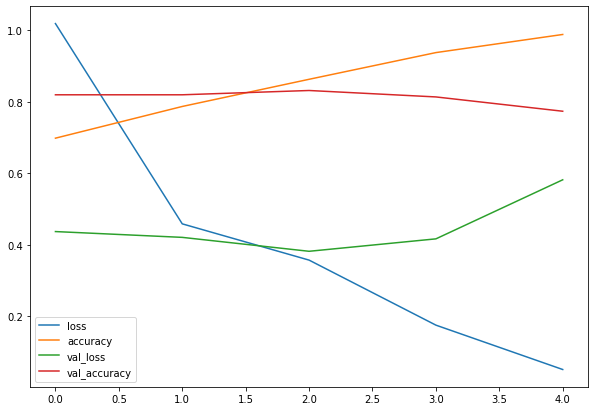

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs we ran for

  # Plot loss
  plt.figure()
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

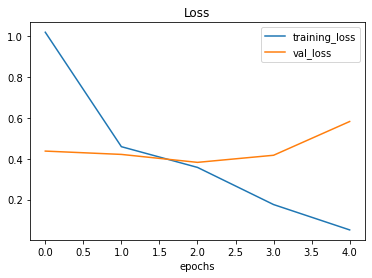

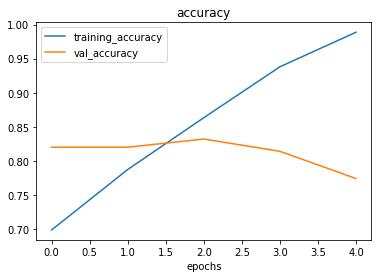

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

In [ ]:
# When a model's validation loss starts to increase it's likely the model is overfitting(learning the patterns too well)

In [ ]:
# 6. Adjust the model parameters

In [ ]:
# Create model_5 (this will be our new baseline)
tf.random.set_seed(42)

model_5 = tf.keras.Sequential()
model_5.add(Conv2D(10,3,activation='relu',input_shape=(224,224,3)))
model_5.add(MaxPool2D(pool_size=2))
model_5.add(Conv2D(10,3,activation='relu'))
model_5.add(MaxPool2D())
model_5.add(Conv2D(10,3,activation='relu'))
model_5.add(MaxPool2D())
model_5.add(Flatten())
model_5.add(Dense(1,activation='sigmoid'))

In [ ]:
# Compile model_5
loss = tf.keras.losses.BinaryCrossentropy()
opti = tf.keras.optimizers.Adam()
metrics = 'accuracy'
model_5.compile(loss=loss,optimizer=opti,metrics=metrics)

In [ ]:
# Fit model_5 
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6099 - accuracy: 0.6660 - val_loss: 0.4847 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4720 - accuracy: 0.7913 - val_loss: 0.4053 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 8s 178ms/step - loss: 0.4269 - accuracy: 0.8040 - val_loss: 0.4202 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4229 - accuracy: 0.8153 - val_loss: 0.3307 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.3771 - accuracy: 0.8273 - val_loss: 0.4077 - val_accuracy: 0.7980


In [ ]:
# Check out the model summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

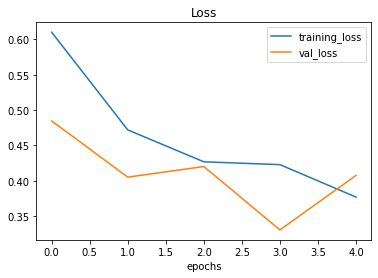

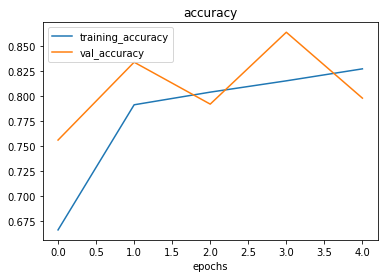

In [ ]:
# Plot the loss curves
plot_loss_curves(history_5)

In [ ]:
# Opening our bag of tricks and finding data augmentation 

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # rotate the image
                                             shear_range=0.2, # shear an image
                                             zoom_range=0.2, # zoom in on an image
                                             width_shift_range=0.3, # move on x-axis
                                             height_shift_range=0.3, # move on y-axis
                                             horizontal_flip=True) # flip an image
# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator withouth data agumentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Visualize data augmentation

In [ ]:
# Import data and augment it from training directory 
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode='binary',
                                                                      shuffle=False) # for demonstration purposes only 

# Create non augmented data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary')


Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented data
Found 500 images belonging to 2 classes.


In [ ]:
# Finally let's visualize data augmentation

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_datagen_augmented.next() # labels are not augmented, only the images are

AttributeError: ignored

In [ ]:
# Show the original image and augmented image
import random
random_number = random.randint(0,32) # batch size is 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)

In [ ]:
# Create a model same as model_5, but use augmented data

In [ ]:
# Create model_6
model_6 = tf.keras.Sequential()
model_6.add(Conv2D(10,3,activation='relu'))
model_6.add(MaxPool2D(pool_size=2))
model_6.add(Conv2D(10,3,activation='relu'))
model_6.add(MaxPool2D())
model_6.add(Conv2D(10,3,activation='relu'))
model_6.add(Flatten())
model_6.add(Dense(1,activation='sigmoid'))

# Compile model_6
loss = tf.keras.losses.BinaryCrossentropy()
opti = tf.keras.optimizers.Adam()
metrics = 'accuracy'
model_6.compile(loss=loss,optimizer=opti,metrics=metrics)

# Fit model_6
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented), 
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
# Check the training curves
plot_loss_curves(history_6)

In [ ]:
# Let's shuffle our augmented training data and train another model with the same architecture

In [ ]:
# Import data and augment it and shuffle it from training directory
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size=(224,224),
                                                                           class_mode='binary',
                                                                           batch_size=32,
                                                                           shuffle=True)

In [ ]:
# Create the model, same as 5 and 6
model_7 = tf.keras.Sequential()
model_7.add(Conv2D(10,3,activation='relu'))
model_7.add(MaxPool2D(pool_size=2))
model_7.add(Conv2D(10,3,activation='relu'))
model_7.add(MaxPool2D())
model_7.add(Conv2D(10,3,activation='relu'))
model_7.add(MaxPool2D())
model_7.add(Flatten())
model_7.add(Dense(1,activation='sigmoid'))

# Compile model_7
loss = tf.keras.losses.BinaryCrossentropy()
opti = tf.keras.optimizers.Adam()
metrics = 'accuracy'
model_7.compile(loss=loss,optimizer=opti,metrics=metrics)

# Fit model_7
history_7 = model_7.fit(train_data_augmented_shuffle,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffle),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
# Plot loss curves
plot_loss_curves(history_7)

In [ ]:
# Repeat until satisfied
### Challenge time - improve the model
# Ways to improve the model - increase number of layers, filters in each Conv layer, train for longer, find ideal learning rate, get more data, use transfer learning

In [ ]:
# Create a model with two Conv2D and two MaxPool2D layers
model_8 = tf.keras.Sequential()
model_8.add(Conv2D(10,3,activation='relu'))
model_8.add(MaxPool2D(pool_size=2))
model_8.add(Conv2D(10,3,activation='relu'))
model_8.add(MaxPool2D())
model_8.add(Flatten())
model_8.add(Dense(1,activation='sigmoid'))

# Compile model_8
loss = tf.keras.losses.BinaryCrossentropy()
opti = tf.keras.optimizers.Adam()
metrics = 'accuracy'
model_8.compile(loss=loss,optimizer=opti,metrics=metrics)

# Fit model_8
history_8 = model_8.fit(train_data_augmented_shuffle,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffle),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history_8)

In [ ]:
# Create a model with more filters 
model_9 = tf.keras.Sequential()
model_9.add(Conv2D(filters=64,
                   kernel_size=3,
                   activation='relu'))
model_9.add(MaxPool2D(pool_size=2))
model_9.add(Conv2D(64,3,activation='relu'))
model_9.add(MaxPool2D())
model_9.add(Flatten())
model_9.add(Dense(1,activation='sigmoid'))

# Compile model_9
loss = tf.keras.losses.BinaryCrossentropy()
opti = tf.keras.optimizers.Adam()
metrics = 'accuracy'
model_9.compile(loss=loss,optimizer=opti,metrics=metrics)

# Fit model_9
history_9 = model_9.fit(train_data_augmented_shuffle,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffle),
                        validation_data=test_data,
                        validation_steps=len(test_data))

NameError: ignored

In [ ]:
plot_loss_curves(history_9)

In [ ]:
# The results are looking better, time to add another layer with increased filters!

In [ ]:
# Create model_10
model_10 = tf.keras.Sequential()
model_10.add(Conv2D(32,3,activation='relu'))
model_10.add(MaxPool2D(pool_size=2))
model_10.add(Conv2D(32,3,activation='relu'))
model_10.add(MaxPool2D())
model_10.add(Conv2D(32,3,activation='relu'))
model_10.add(MaxPool2D())
model_10.add(Flatten())
model_10.add(Dense(1,activation='relu'))

# Compile model_10
loss = tf.keras.losses.BinaryCrossentropy()
opti = tf.keras.optimizers.Adam()
metrics = 'accuracy'
model_10.compile(loss=loss,optimizer=opti,metrics=metrics)

# Fit model_10
history_10 = model_10.fit(train_data_augmented_shuffle,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented_shuffle),
                          validation_data=test_data,
                          validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history_10)

In [ ]:
model_10.summary()

In [ ]:
model_9.summary()

In [ ]:
# Making a prediction with our trained model with our own custom data

In [ ]:
# Classes we're working with
print(class_names)

--2021-07-17 07:37:22--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1         [ <=>                ] 119.21K  --.-KB/s    in 0.02s   

2021-07-17 07:37:23 (5.34 MB/s) - ‘03-steak.jpeg.1’ saved [122073]



(-0.5, 3023.5, 4031.5, -0.5)

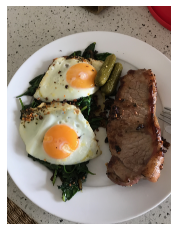

In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
# Can we pass this directly to our model?
steak.shape

(4032, 3024, 3)

In [ ]:
# Create a function to import and resize the image 

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img
  

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
model_9.predict(steak)

NameError: ignored